# June 29, 2019 Word Matrix and TF-IDF 
* name : Jikhan Jeong
* reference: http://doc.mindscale.kr/km/unstructured/03.html

* Sentence -> Token (size for text analysis) : this process called tokenization
* Morpheme: the minimum word unit contains the meaning
* Corpus: set of texts
* Term-document matrix (TDM) : showing a frequency of word in a sentence
* sparse matrix: 0,0...1,...0 cause porblem so that using normalization and embedding

# TF-IDF (term frequency - inverse document frequency) 
* showing how much the word is important in the documdent
* word in all sentence, low weight (e.g, and)
* word in specific sentence, high weight

In [2]:
from keras.preprocessing.image import load_img

Using TensorFlow backend.


In [9]:
tf_idf = load_img('tf.png') # size (673, 202)

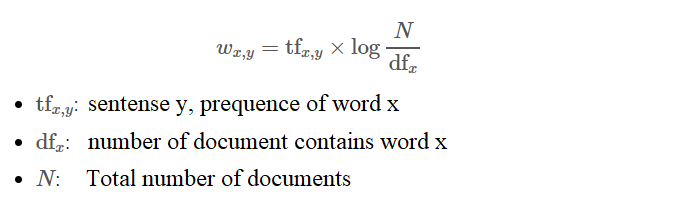

In [10]:
tf_idf

# Amazon Review TDM
* reference: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

In [11]:
import pandas as pd

In [13]:
pwd

'C:\\Users\\정직한\\2019_Deep_Learning'

In [16]:
df = pd.read_csv('review/amazon_cells_labelled.txt', sep="\t", header=None) # seperated by btab = t, header = None

In [18]:
df.shape 

(1000, 2)

In [19]:
df.head(1)

,0,1
0,So there is no way for me to plug it in here i...,0


In [20]:
sentence = df[0]
label = df[1]

# Term-document matrix(TDM) by using TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tfidf = TfidfVectorizer(stop_words='english',
                        lowercase=True,
                        max_features=1000)

In [24]:
tdm = tfidf.fit_transform(sentence)

In [26]:
tdm

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 4060 stored elements in Compressed Sparse Row format>

In [30]:
tfidf.get_feature_names()[-5:] # get feature word list in TDM, in here, we see last 5 words in the list

['wrongly', 'year', 'years', 'yell', 'yes']

# Saving data to pikel stile by using joblib in Sklearn package

In [32]:
from sklearn.externals import joblib # joblib is similar with pickel and save the values

In [40]:
with open ('amazon.pkl', 'wb') as f: # saved as a f
    joblib.dump(
        {'vectorizer': tfidf, 'tdm' : tdm, 'sentiment': label}, # joblib.dump = save
        f
    )

# load saved pikel data for basic analysis

In [41]:
from sklearn.externals import joblib

In [42]:
with open('amazon.pkl','rb') as f:
    data = joblib.load(f)

In [43]:
locals().update(data)

* .sum / axis =0 for column sum, axis=1 for row sum

In [46]:
type(tdm)

scipy.sparse.csr.csr_matrix

In [49]:
tdm.shape

(1000, 1000)

In [50]:
count = tdm.sum(axis=0)

In [52]:
word_count = pd.DataFrame({
    'word' : vectorizer.get_feature_names(),
    'count':count.flat})

C:\python\lib\site-packages\pandas\core\dtypes\dtypes.py:458: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


In [53]:
word_count.tail() # last five word

,word,count
995,wrongly,0.396701
996,year,3.274197
997,years,3.972779
998,yell,0.539954
999,yes,0.638298


* arrange based on frequency of word

In [55]:
sorted_df = word_count.sort_values('count', ascending=False)

In [56]:
sorted_df.head(5)

,word,count
459,phone,46.663864
310,great,40.657307
306,good,29.231608
522,product,23.608777
985,works,21.664389
